# Image filtering or Local image operators
Image filtering here is a process of applying different filters to a given image. You apply a filter to an image by performing a 2D convolution operation. In simple words, you take your smaller matrix, known as _kernel_ and slide over a big matrix, here _image_, and multiple and add the corresponding overlapping values.
There are many more details and correct definitions of this process that include dealing with border conditions and the art of the sliding, but it is not the focus here.

At this stage, we just assume we have a kernel and would like to see the effects it does when applied to images.

## Box filter

We are going to start with Box filter. Box filter is also called  as _moving average_ filter. It computes the average of the elements since it has the following form for a 3x3 kernel:
$$
    \frac{1}{3^2}  
    \begin{pmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
    \end{pmatrix}
$$
This kernel has also a property that it is **separable**. This means we can represent it using 1D kernels.
$$
    \frac{1}{3^2}  
    \begin{pmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
    \end{pmatrix} = 
    \frac{1}{3} \begin{pmatrix}1 \\ 1 \\ 1 \end{pmatrix} \cdot \frac{1}{3}  \begin{pmatrix} 1 & 1 & 1 \end{pmatrix}
$$
Thus it should have the same result if we apply it as a matrix or as row vector and column vector convolution.

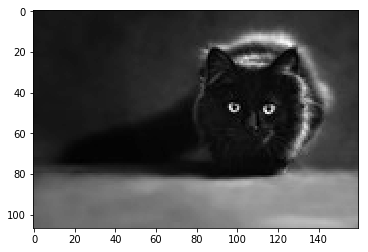

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_name = "data/cat_black_small.jpg"
# img_name = "../data/cat-rusty.jpg"
# img_name = "data/starry_night_small.jpg"
image = cv2.imread(img_name, 0);
plt.imshow(image, cmap='gray');

In [4]:
import time
import linear_filtering as LF

kernel_size = 15
start = time.time()
img_smooth_box_matrix = LF.apply_box_filter(image, kernel_size)
end = time.time()
print("Box filter matrix time", end-start, "sec")

start = time.time()
img_smooth_box_vectors = LF.apply_box_filter_separable_kernel(image, kernel_size)
end = time.time()
print("Box filter vector time", end-start, "sec")

Box filter matrix time 1.8260080814361572 sec
Box filter vector time 0.2966313362121582 sec


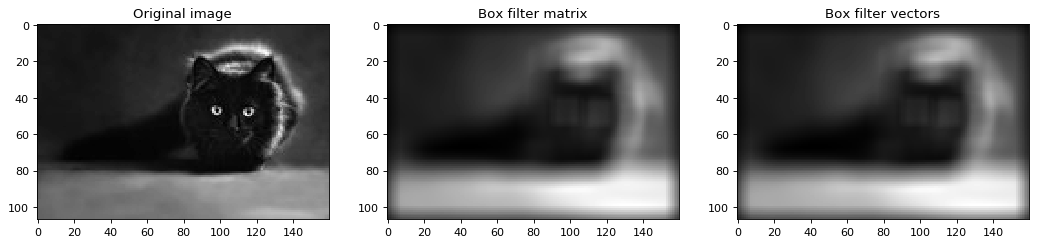

In [5]:
## plotting
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131)
plt.imshow(image, cmap="gray")
plt.title("Original image");

plt.subplot(132)
plt.imshow(img_smooth_box_matrix, cmap="gray")
plt.title("Box filter matrix");

plt.subplot(133)
plt.imshow(img_smooth_box_vectors, cmap="gray")
plt.title("Box filter vectors");


### Box filter using integral images
Add here pictures with how to get integral image; how to handle border conditions and construct the convolved image

In [8]:
start = time.time()
img_smooth_box_integral = LF.convolve_integral_image(image, kernel_size)
end = time.time()
print("Box filter vector time", end-start, "sec")

Box filter vector time 0.06336331367492676 sec


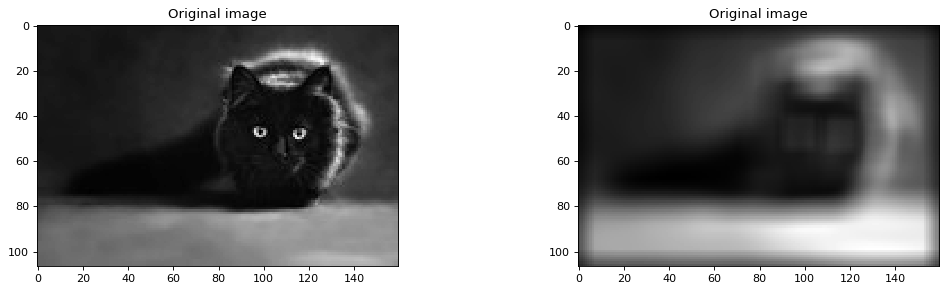

In [9]:
## plotting
fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Original image");

plt.subplot(122)
plt.imshow(img_smooth_box_integral, cmap="gray")
plt.title("Original image");